In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import pickle

from glob import glob
from tqdm import tqdm

from collections import defaultdict
from datetime import date
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, mean_squared_error, r2_score, mean_absolute_error

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
import sys

sys.path.append("..")
from src.plot_style import *
stdrcparams(usetex=False)

In [4]:
df_simultaneousClassification_BTF = pd.read_csv('../results/Air_Classification_BTF_simultaneous.csv')[['Year','Removed','simultaneous_pred','simultaneous_null']]
df_simultaneousClassification_WTF = pd.read_csv('../results/Air_Classification_WTF_simultaneous.csv')[['Year','Removed','simultaneous_pred','simultaneous_null']]
df_simultaneousClassification_WWW = pd.read_csv('../results/Air_Classification_WWW_simultaneous.csv')[['Year','Removed','simultaneous_pred','simultaneous_null']]
df_simultaneousClassification_BTFW = pd.read_csv('../results/Air_Classification_BTFW_simultaneous.csv')[['Year','Removed','simultaneous_pred','simultaneous_null']]

In [5]:
df_simultaneousClassification = {'Unweighted Topological Features': df_simultaneousClassification_BTF,
                                 'Weighted Topological Features': df_simultaneousClassification_WTF,
                                 'Weight (Number of Flights)': df_simultaneousClassification_WWW,
                                 'Unweighted Topological Features + Weight': df_simultaneousClassification_BTFW
                                }

In [6]:
def pure_plot_confusion_matrix(cm, ax = None):
    classes = ['Retained','Removed']
    sns.heatmap(cm, square = True, annot= True, cbar = False, cmap=plt.cm.Blues,ax = ax,annot_kws={"fontsize":25})
    ax.set_ylim(0,2)
    ax.tick_params( bottom=False, right=False,left=False, labeltop=False, labelbottom=True)
    ax.invert_yaxis()
    ax.set(xticks = np.arange(cm.shape[1])+0.5,
           yticks = np.arange(cm.shape[0])+0.25,
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel = 'True label',
           xlabel = 'Predicted label') 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


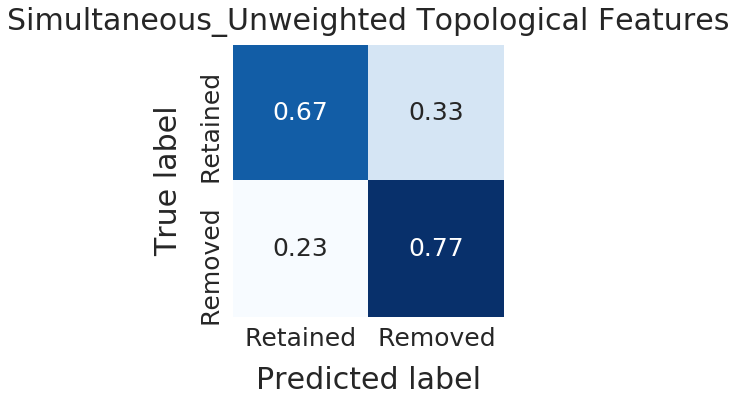

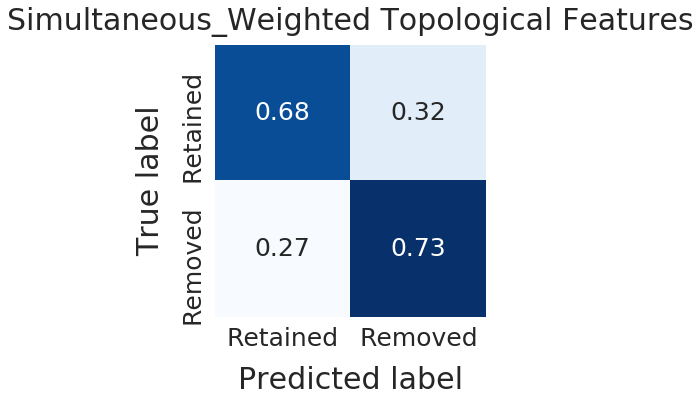

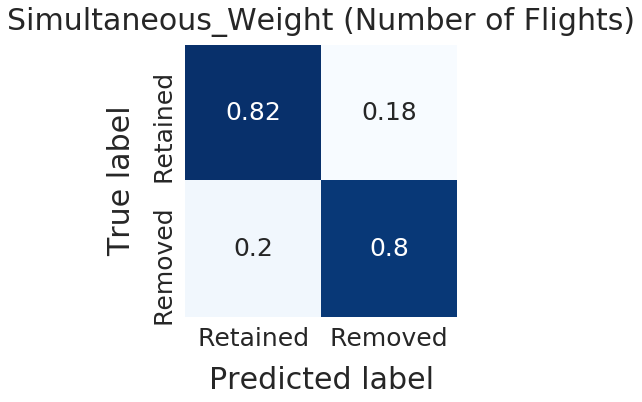

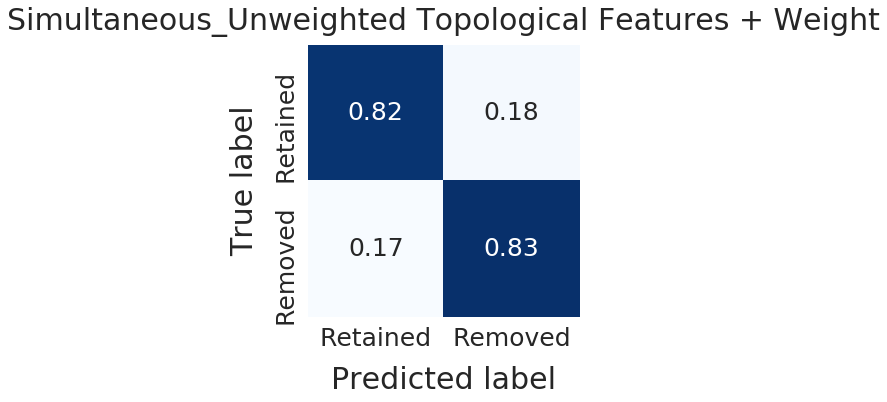

In [7]:
year = '2008-01-01'
for name,df in df_simultaneousClassification.items():
    y_test, y_predict = df[df.Year==year][['Removed','simultaneous_pred']].values.T
    cm = confusion_matrix(y_test, y_predict)
    cm = cm.astype('float') / cm.sum(axis = 1)[:,None]
    fig,ax = plt.subplots(figsize=(5,5))
    plt.title(f"Simultaneous_{name}")
    pure_plot_confusion_matrix(cm, ax=ax)
    plt.show()

In [8]:
from datetime import datetime,date
year_list = df_simultaneousClassification_BTF.Year.unique()
balanced_acc = defaultdict(list)
for name,df in df_simultaneousClassification.items():
    for year in year_list:  
        if datetime.strptime(year, '%Y-%m-%d').date()>date(2018,12,1):continue
        y_test, y_predict, y_null = df[df.Year==year][['Removed','simultaneous_pred','simultaneous_null']].values.T
        balanced_acc['Balanced Acc'].append(balanced_accuracy_score(y_test, y_predict))
        balanced_acc['Balanced Acc Null'].append(balanced_accuracy_score(y_test, y_null))
        balanced_acc['Model'].append(name)

In [9]:
df = pd.DataFrame(balanced_acc)
df = df.groupby('Model').mean()
df

,Balanced Acc,Balanced Acc Null
Model,,
Unweighted Topological Features,0.704954,0.497316
Unweighted Topological Features + Weight,0.816970,0.501868
Weight (Number of Flights),0.815294,0.520346
Weighted Topological Features,0.711543,0.498207


In [10]:
with open('../results/Air_Classification_BTF_nonsimultaneous.pkl','rb') as f:    
    df_nonsimultaneousClassification_BTF = pickle.load(f)
with open('../results/Air_Classification_WTF_nonsimultaneous.pkl','rb') as f:    
    df_nonsimultaneousClassification_WTF = pickle.load(f)
with open('../results/Air_Classification_WWW_nonsimultaneous.pkl','rb') as f:    
    df_nonsimultaneousClassification_WWW = pickle.load(f)
with open('../results/Air_Classification_BTFW_nonsimultaneous.pkl','rb') as f:    
    df_nonsimultaneousClassification_BTFW = pickle.load(f)

In [11]:
df_nonsimultaneousClassification = {'Unweighted Topological Features': df_nonsimultaneousClassification_BTF,
                                     'Weighted Topological Features': df_nonsimultaneousClassification_WTF,
                                     'Weight (Number of Flights)': df_nonsimultaneousClassification_WWW,
                                     'Unweighted Topological Features + Weight': df_nonsimultaneousClassification_BTFW}

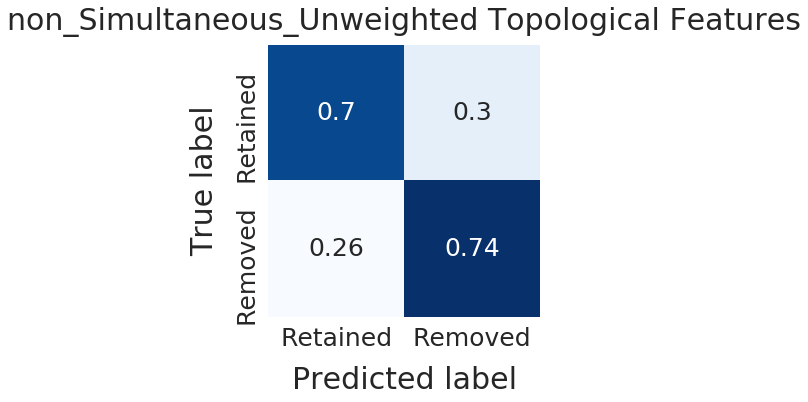

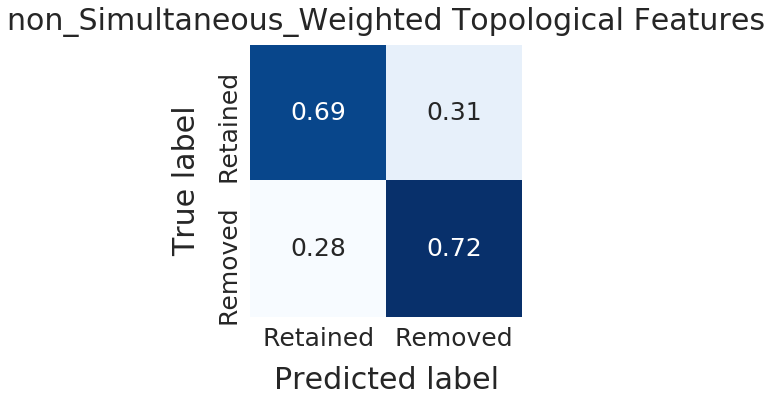

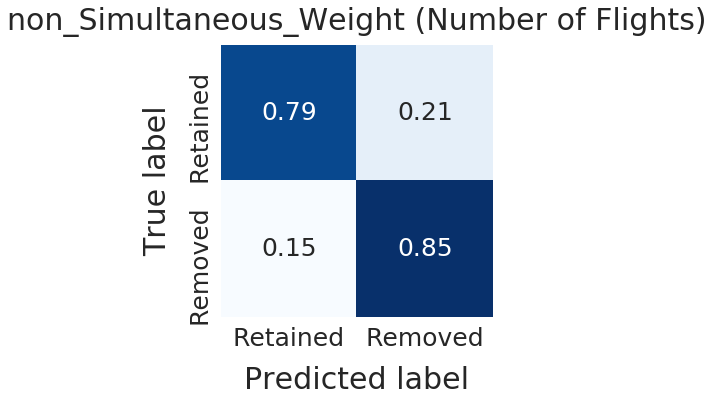

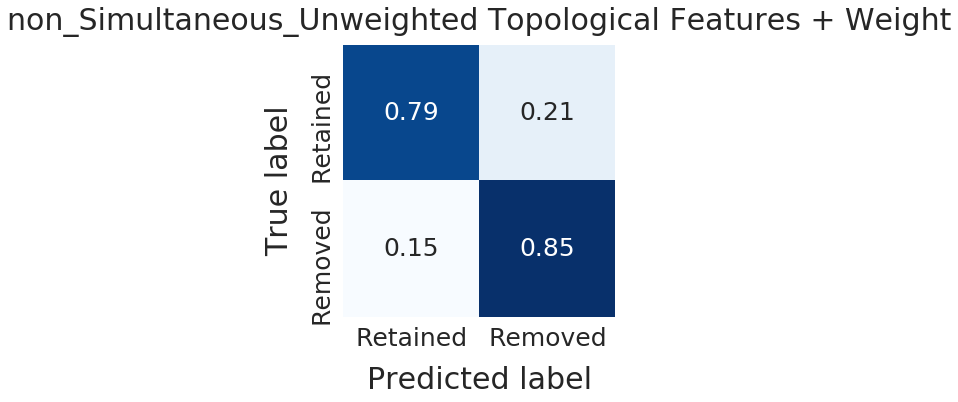

In [12]:
year0 = '2009-01-01'
year1 = '2009-03-01'
for name,df in df_nonsimultaneousClassification.items():
    for year_train , year_test, y_test, y_pred, y_null in df:
        if year_train==year0 and year_test==year1:
            break
    y_test, y_predict = y_test, y_pred
    cm = confusion_matrix(y_test, y_predict)
    cm = cm.astype('float') / cm.sum(axis = 1)[:,None]
    fig,ax = plt.subplots(figsize=(5,5))
    plt.title(f"non_Simultaneous_{name}")
    pure_plot_confusion_matrix(cm, ax=ax)
    plt.show()

In [13]:
from collections import defaultdict
from datetime import datetime,date
balanced_acc_non = defaultdict(list)
for name, df in df_nonsimultaneousClassification.items():
    for year_train , year_test, y_test, y_pred, y_null in df:
        if year_train!=year_test and datetime.strptime(year_train, '%Y-%m-%d').date()<date(2018,12,1):
            balanced_acc_non['Balanced Acc'].append(balanced_accuracy_score(y_test, y_pred))
            balanced_acc_non['Balanced Acc Null'].append(balanced_accuracy_score(y_test, y_null))
            balanced_acc_non['Model'].append(name)
            if datetime.strptime(year_test, '%Y-%m-%d').date()>date(2018,12,1): 
                balanced_acc_non['Time'].append('Travel restrictions')
            else:
                balanced_acc_non['Time'].append('Before 2019')

In [14]:
df = pd.DataFrame(balanced_acc_non)
df = df.groupby(['Model','Time']).mean()
df

Balanced Acc  \
Model                                    Time                                
Unweighted Topological Features          Before 2019              0.695202   
                                         Travel restrictions      0.685911   
Unweighted Topological Features + Weight Before 2019              0.816544   
                                         Travel restrictions      0.800749   
Weight (Number of Flights)               Before 2019              0.816343   
                                         Travel restrictions      0.799877   
Weighted Topological Features            Before 2019              0.703427   
                                         Travel restrictions      0.688943   

                                                              Balanced Acc Null  
Model                                    Time                                    
Unweighted Topological Features          Before 2019                   0.498635  
                                         Travel restrictions           0.498530  
Unweighted Topological Features + Weight Before 2019                   0.500484  
                                         Travel restrictions           0.505967  
Weight (Number of Flights)               Before 2019                   0.507520  
                                         Travel restrictions           0.491898  
Weighted Topological Features            Before 2019                   0.500584  
                                         Travel restrictions           0.503976

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


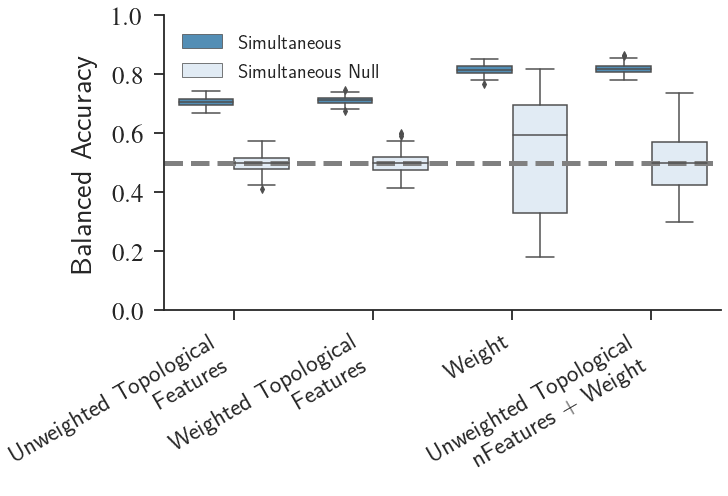

In [15]:
stdrcparams(usetex=True)
df1 = pd.DataFrame(balanced_acc)[['Model','Balanced Acc']]
df1['Test'] = 'Simultaneous'
df2 = pd.DataFrame(balanced_acc_non)[['Model','Balanced Acc']]
df2['Test'] = 'Non-Simultaneous'
df3 = pd.DataFrame(balanced_acc)[['Model','Balanced Acc Null']].rename(columns={'Balanced Acc Null':'Balanced Acc'})
df3['Test'] = 'Simultaneous Null'
df4 = pd.DataFrame(balanced_acc_non)[['Model','Balanced Acc Null']].rename(columns={'Balanced Acc Null':'Balanced Acc'})
df4['Test'] = 'Non-Simultaneous Null'
df = pd.concat([df1,df3])
models=[ 'Unweighted Topological Features',
         'Weighted Topological Features',
         'Weight (Number of Flights)',
         'Unweighted Topological Features + Weight']
xlbls=[ 'Unweighted Topological \nFeatures',
         'Weighted Topological \nFeatures',
         'Weight',
         'Unweighted Topological \nnFeatures + Weight']
df = df[df.Model.isin(models)]
fig,ax = plt.subplots(figsize=(xs*0.9,ys))
ax = sns.boxplot(x="Model", y="Balanced Acc",hue='Test',
                 palette=sns.color_palette(['#4292c6','#deebf7']),#,'#41ab5d','#e5f5e0']),
                 data=df,ax=ax,linewidth=1.5,
                 hue_order=['Simultaneous','Simultaneous Null'])#,'Non-Simultaneous','Non-Simultaneous Null'])
custom_frame(ax)
plt.ylabel('Balanced Accuracy')
plt.xlabel('')
plt.xticks(range(4),xlbls)
plt.xticks(rotation=30, ha='right')
plt.legend(frameon=False)
ax.axhline(y=0.5, linestyle = '--',color ='grey')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

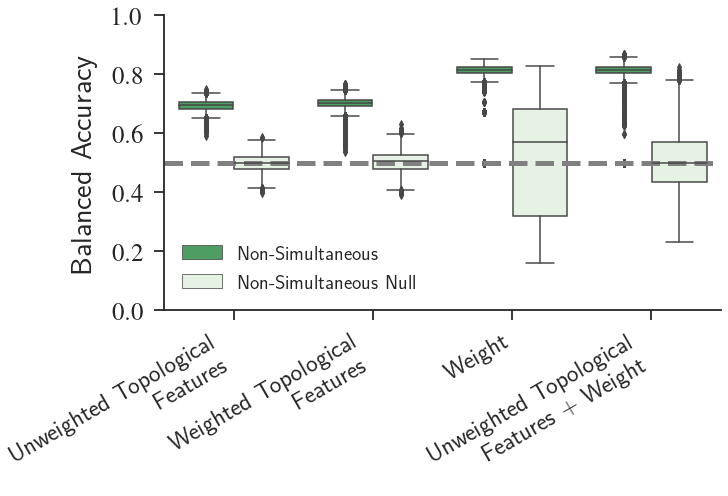

In [16]:
stdrcparams(usetex=True)
df1 = pd.DataFrame(balanced_acc)[['Model','Balanced Acc']]
df1['Test'] = 'Simultaneous'
df2 = pd.DataFrame(balanced_acc_non)[['Model','Balanced Acc']]
df2['Test'] = 'Non-Simultaneous'
df3 = pd.DataFrame(balanced_acc)[['Model','Balanced Acc Null']].rename(columns={'Balanced Acc Null':'Balanced Acc'})
df3['Test'] = 'Simultaneous Null'
df4 = pd.DataFrame(balanced_acc_non)[['Model','Balanced Acc Null']].rename(columns={'Balanced Acc Null':'Balanced Acc'})
df4['Test'] = 'Non-Simultaneous Null'
df = pd.concat([df2,df4])
models=[ 'Unweighted Topological Features',
         'Weighted Topological Features',
         'Weight (Number of Flights)',
         'Unweighted Topological Features + Weight']
xlbls=[ 'Unweighted Topological \nFeatures',
         'Weighted Topological \nFeatures',
         'Weight',
         'Unweighted Topological \nFeatures + Weight']
df = df[df.Model.isin(models)]
fig,ax = plt.subplots(figsize=(xs*0.9,ys))
ax = sns.boxplot(x="Model", y="Balanced Acc",hue='Test',
                 palette=sns.color_palette(['#41ab5d','#e5f5e0']),#,'#41ab5d','#e5f5e0']),
                 data=df,ax=ax,linewidth=1.5,
                 hue_order=['Non-Simultaneous','Non-Simultaneous Null'])#,'Non-Simultaneous','Non-Simultaneous Null'])
custom_frame(ax)
plt.ylabel('Balanced Accuracy')
plt.xlabel('')
plt.xticks(range(4),xlbls)
plt.xticks(rotation=30, ha='right')
plt.legend(frameon=False)
ax.axhline(y=0.5, linestyle = '--',color ='grey')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

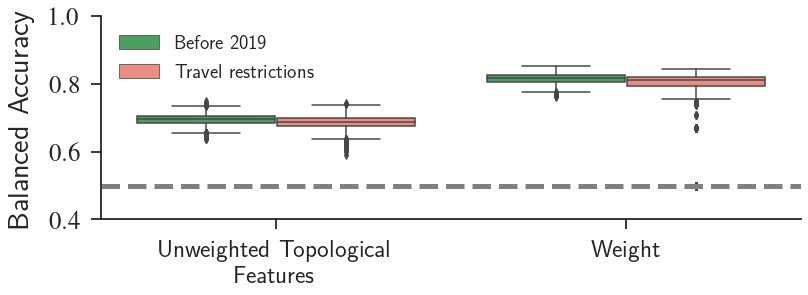

In [17]:
stdrcparams(usetex=True)
df = pd.DataFrame(balanced_acc_non)
models=[ 'Unweighted Topological Features',
         'Weight (Number of Flights)',
       ]
xlbls=[ 'Unweighted Topological \nFeatures',
         'Weight',
      ]

df = df[df.Model.isin(models)]
fig,ax = plt.subplots(figsize=(xs,ys*0.6))
ax = sns.boxplot(x="Model", y="Balanced Acc",hue='Time',
                 palette=sns.color_palette(['#41ab5d','#fb8072']),#,'#41ab5d','#e5f5e0']),
                 data=df,ax=ax,linewidth=1.5,
                 hue_order=['Before 2019','Travel restrictions'])#,'Non-Simultaneous','Non-Simultaneous Null'])
custom_frame(ax)
plt.ylabel('Balanced Accuracy')
plt.xlabel('')
plt.xticks(range(2),xlbls)
plt.legend(frameon=False)
ax.axhline(y=0.5, linestyle = '--',color ='grey')
plt.ylim(0.4,1)
plt.yticks([0.4,0.6,0.8,1.0])
plt.tight_layout()
plt.show()

In [18]:
import shap
def singleShap(test_list, year_list,shap_list):
    year = str(date(2017,1,1))
    idx = year_list.index(year)
    shap_values = shap_list[idx]
    test_df = test_list[idx]
    fig,ax = plt.subplots(figsize=(xs,ys/1.2))
    shap.summary_plot(shap_values, test_df,alpha=0.5,show=False,
                      color_bar=False,auto_size_plot=True,plot_size=(xs,ys/1.2))
    plt.xlabel('SHAP value \n (impact on model output)',fontsize=35)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    labels = [item.get_text() for item in ax.get_yticklabels()]
    for i in range(len(labels)):
        if labels[i]=='Curr FWeight':
            labels[i]= r'\textbf{Weight}'
        if labels[i]=='Resource Allocation':
            labels[i]= r'\textbf{Resource Allocation}'
        elif labels[i]=='Hub Promoted':
            labels[i]=r'\textbf{Hub Promoted}'
        else:
            pass
    ax.set_yticklabels(labels)
    plt.ylim(3.5,11.5)
    plt.xticks([-1,-0.5,0,0.5,1])
    plt.tight_layout()
    plt.show()

In [19]:
def get_temporal_order(shap_list):
    importance_array = []
    for shap_values in shap_list: 
        array = -np.abs(shap_values).mean(0)
        order = array.argsort()
        ranks = order.argsort()
        importance_array.append(ranks+1)
    return(np.array(importance_array))

In [20]:
with open('../results/Air_Classification_BTF_SHAP.pkl','rb') as f:    
    df_SHAPClassification_BTF = pickle.load(f)
with open('../results/Air_Classification_BTFW_SHAP.pkl','rb') as f:    
    df_SHAPClassification_BTFW = pickle.load(f)
df_SHAPClassification = {
                        'BTF': df_SHAPClassification_BTF,
                        'BTFW': df_SHAPClassification_BTFW}

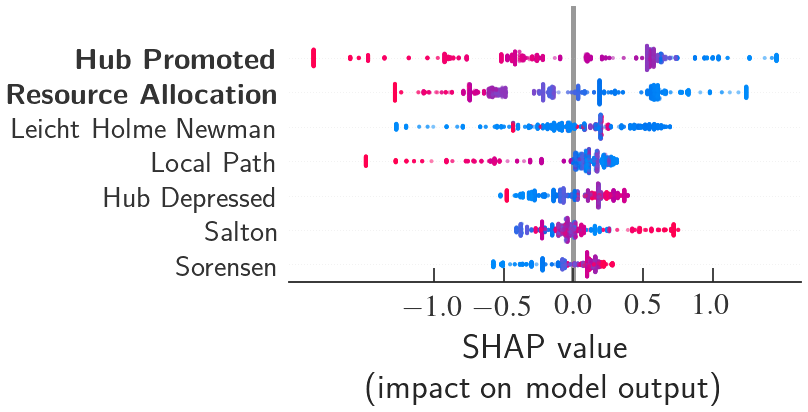

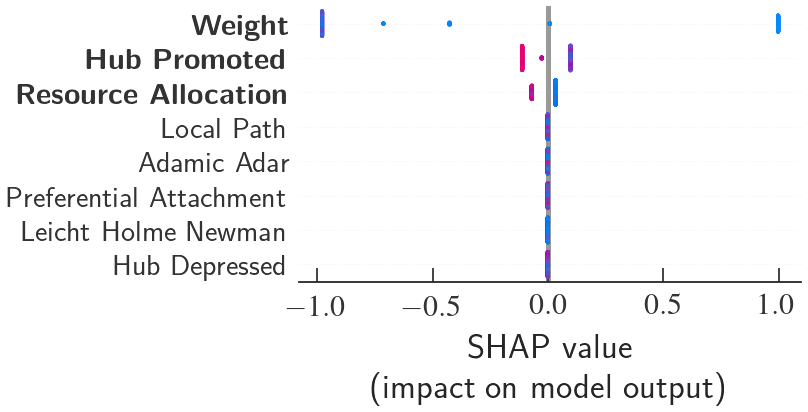

In [21]:
for name, df in df_SHAPClassification.items():
    singleShap(*df)

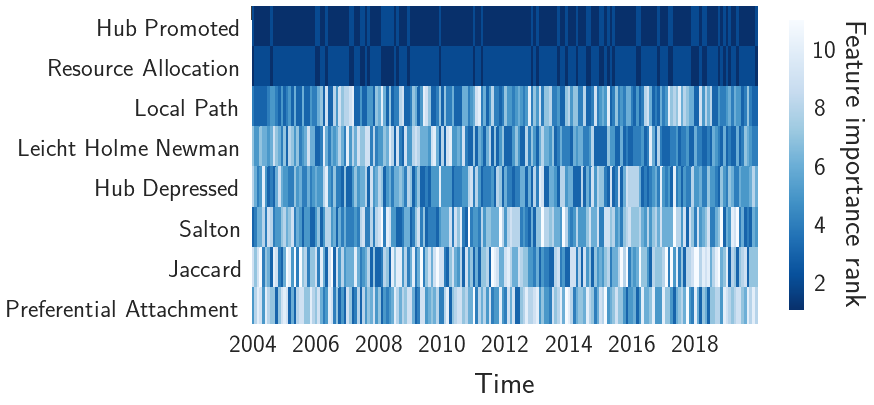

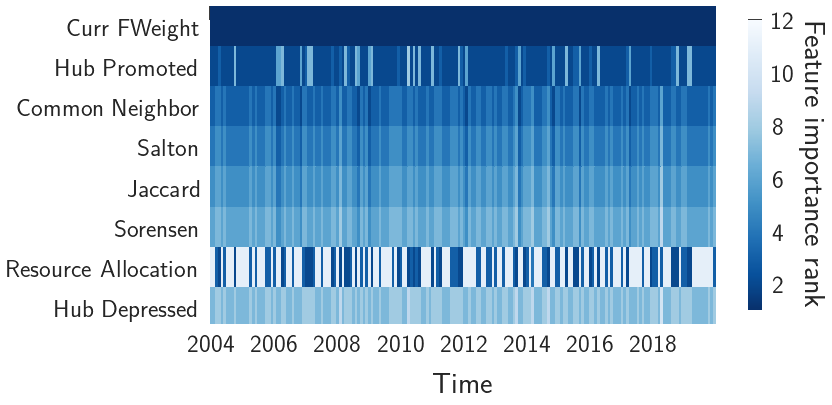

In [22]:
for name, df in df_SHAPClassification.items():
    fig,ax = plt.subplots(figsize=(xs,ys/1.2))
    features = list(df[0][0].columns)
#     features[-1] = 'Weight'
    importance = get_temporal_order(df[2][0:0+24*8])
    x= [j for _,j in sorted(zip(importance.T.mean(1),importance.T))]
    y=  [j for _,j in sorted(zip(importance.T.mean(1),features))]
    ax = sns.heatmap(x,
                     cmap=mpl.cm.get_cmap('Blues_r'),
                     yticklabels=y,
                     xticklabels=False,
                     cbar_kws={'label': 'Feature importance rank',
                               'ticks': [2,4,6,8,10,12] ,
                               'shrink': 11/12,
                              'anchor':(0.0, 100)}
                    )
    cbar = ax.collections[0].colorbar
    cbar.set_ticklabels(['2','4','6','8','10','12'])
    cbar.set_label('Feature importance rank',labelpad=30,rotation=360-90)
    plt.ylim(7.9,0)
    plt.xticks([0+24*i for i in range(8)],[date(2004+i*2,1,1).year for i in range(8)])
    plt.xlabel('Time')
    plt.show()

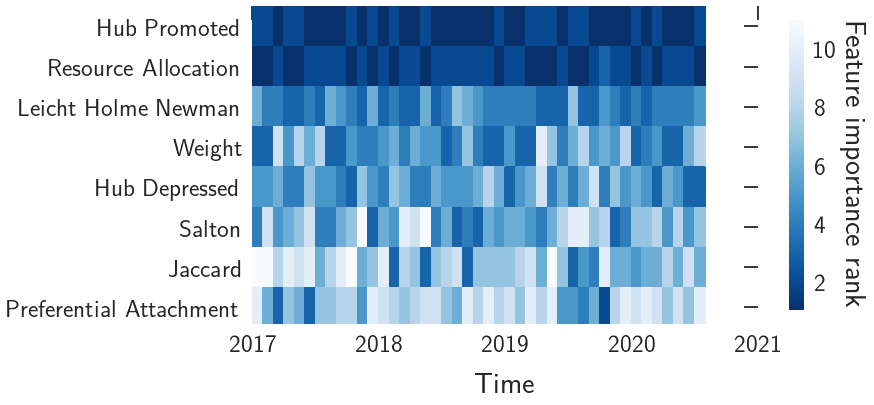

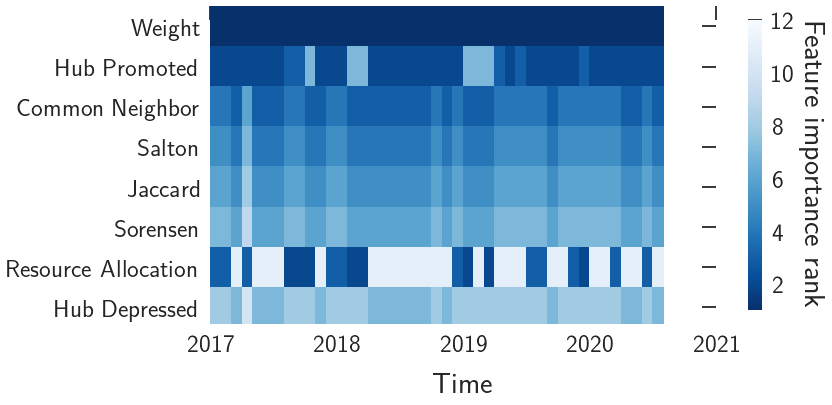

In [23]:
for name, df in df_SHAPClassification.items():
    fig,ax = plt.subplots(figsize=(xs,ys/1.2))
    features = list(df[0][0].columns)
    features[-1] = 'Weight'
    importance = get_temporal_order(df[2][0+24*8-24:])
    x= [j for _,j in sorted(zip(importance.T.mean(1),importance.T))]
    y=  [j for _,j in sorted(zip(importance.T.mean(1),features))]
    ax = sns.heatmap(x,
                     cmap=mpl.cm.get_cmap('Blues_r'),
                     yticklabels=y,
                     xticklabels=False,
                     cbar_kws={'label': 'Feature importance rank',
                               'ticks': [2,4,6,8,10,12] ,
                               'shrink': 11/12,
                              'anchor':(0.0, 100)}
                    )
    cbar = ax.collections[0].colorbar
    cbar.set_ticklabels(['2','4','6','8','10','12'])
    cbar.set_label('Feature importance rank',labelpad=30,rotation=360-90)
    plt.ylim(7.9,0)
    plt.xticks([0+12*i for i in range(5)],[date(2017+i*1,1,1).year for i in range(5)])
#     plt.ylabel('Features')
    plt.xlabel('Time')
    plt.show()

In [24]:
X = defaultdict(list)
for file in glob('../results/2*pred_36.pkl'):
    year = file.split('/')[-1].split('_')[0].rstrip('pred')
    with open(file,'rb') as f:
        diff_btf ,diff_www, btf_diff, www_diff = list(pickle.load(f).values())[0] 
        X['Time'] += [year]*len(btf_diff + www_diff)
        X['Timesteps'] += [i for i in range(len(btf_diff))] + [i for i in range(len(www_diff))]
        X["Model"] += ['BTF']*len(btf_diff)+['Weight']*len(www_diff)
        X['Precision'] += diff_btf + diff_www
        X['Similarity'] += btf_diff + www_diff
df = pd.DataFrame(X)
df.head()

,Time,Timesteps,Model,Precision,Similarity
0,2016-11-01,0,BTF,0.580714,1.000000
1,2016-11-01,1,BTF,0.421320,0.792957
2,2016-11-01,2,BTF,0.417100,0.734596
3,2016-11-01,3,BTF,0.426912,0.684476
4,2016-11-01,4,BTF,0.476852,0.668225


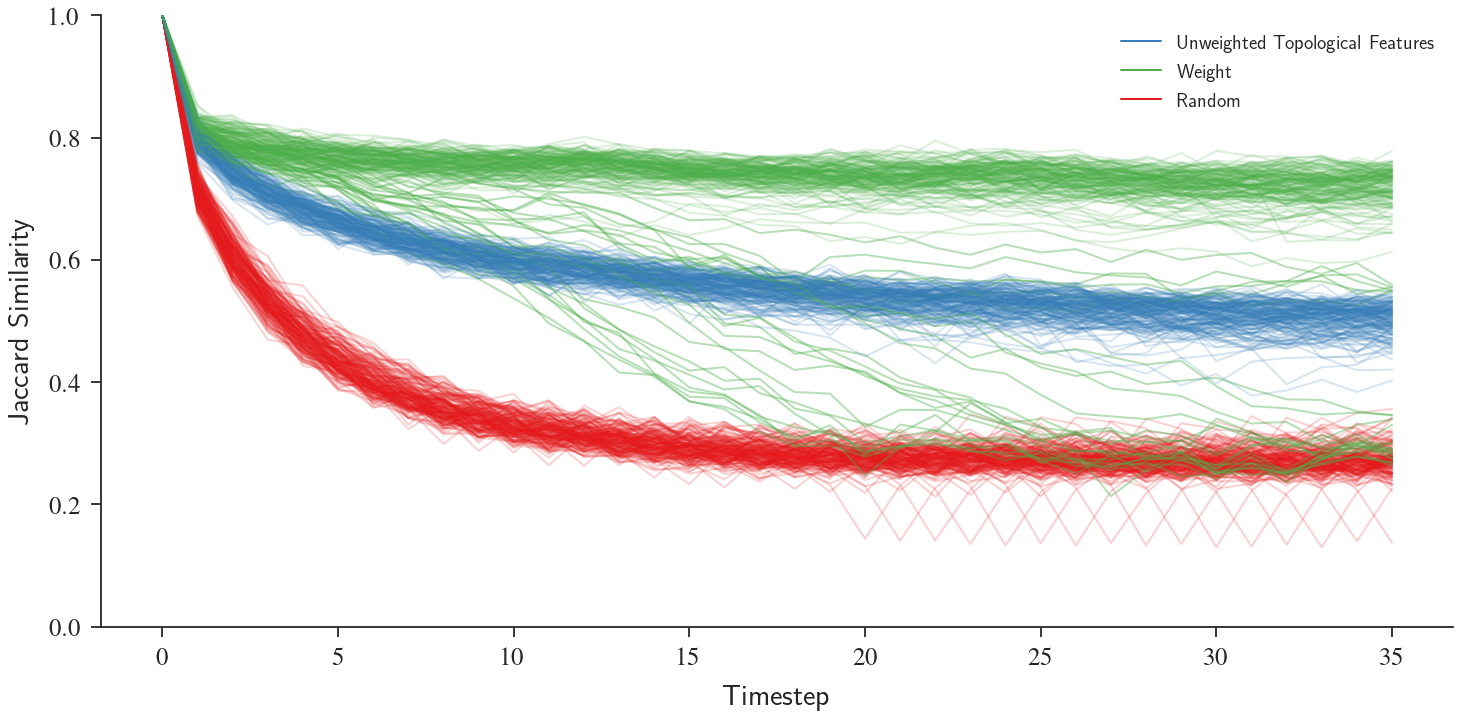

In [25]:
stdrcparams(usetex=True)
fig,ax= plt.subplots(figsize=(xs*2*0.9,ys*1.6*0.9))

for file in glob('../results/2*-01pred_36_null.pkl'):
    with open(file,'rb') as f:    
        diff_btf,null_diff = list(pickle.load(f).values())[0] 
        plt.plot(null_diff,c='#e41a1c',alpha=0.2,linewidth=2)

count = 0
for file in glob('../results/2*pred_36.pkl'):
    with open(file,'rb') as f:    
        diff_btf,diff_www,btf_diff, www_diff = list(pickle.load(f).values())[0] 
        plt.plot(btf_diff,c='#377eb8',alpha=0.2,linewidth=2)
        if www_diff[-1]<=0.6:
            count+=1
            plt.plot(www_diff,c='#4daf4a',alpha=0.4,linewidth=2)
        else:       
            plt.plot(www_diff,c='#4daf4a',alpha=0.2,linewidth=2)

plt.plot([],[],c='#377eb8',label="Unweighted Topological Features",alpha=1,linewidth=2)
plt.plot([],[],c='#4daf4a',label="Weight",alpha=1,linewidth=2)
plt.plot([],[],c='#e41a1c',label="Random",alpha=1,linewidth=2)

plt.ylabel('Jaccard Similarity')
plt.xlabel('Timestep')
plt.legend(frameon=False)
plt.ylim(0,1)
custom_frame(ax)
plt.tight_layout()
plt.show()

In [26]:
total = len(glob('../results/2*pred_36.pkl'))
print(f'Fraction of extrem results: {count/total}')

Fraction of extrem results: 0.13636363636363635
